In [55]:
import pint
import numpy as np
from sympy import symbols, Eq, solve

ureg = pint.get_application_registry()
Q_ = ureg.Quantity

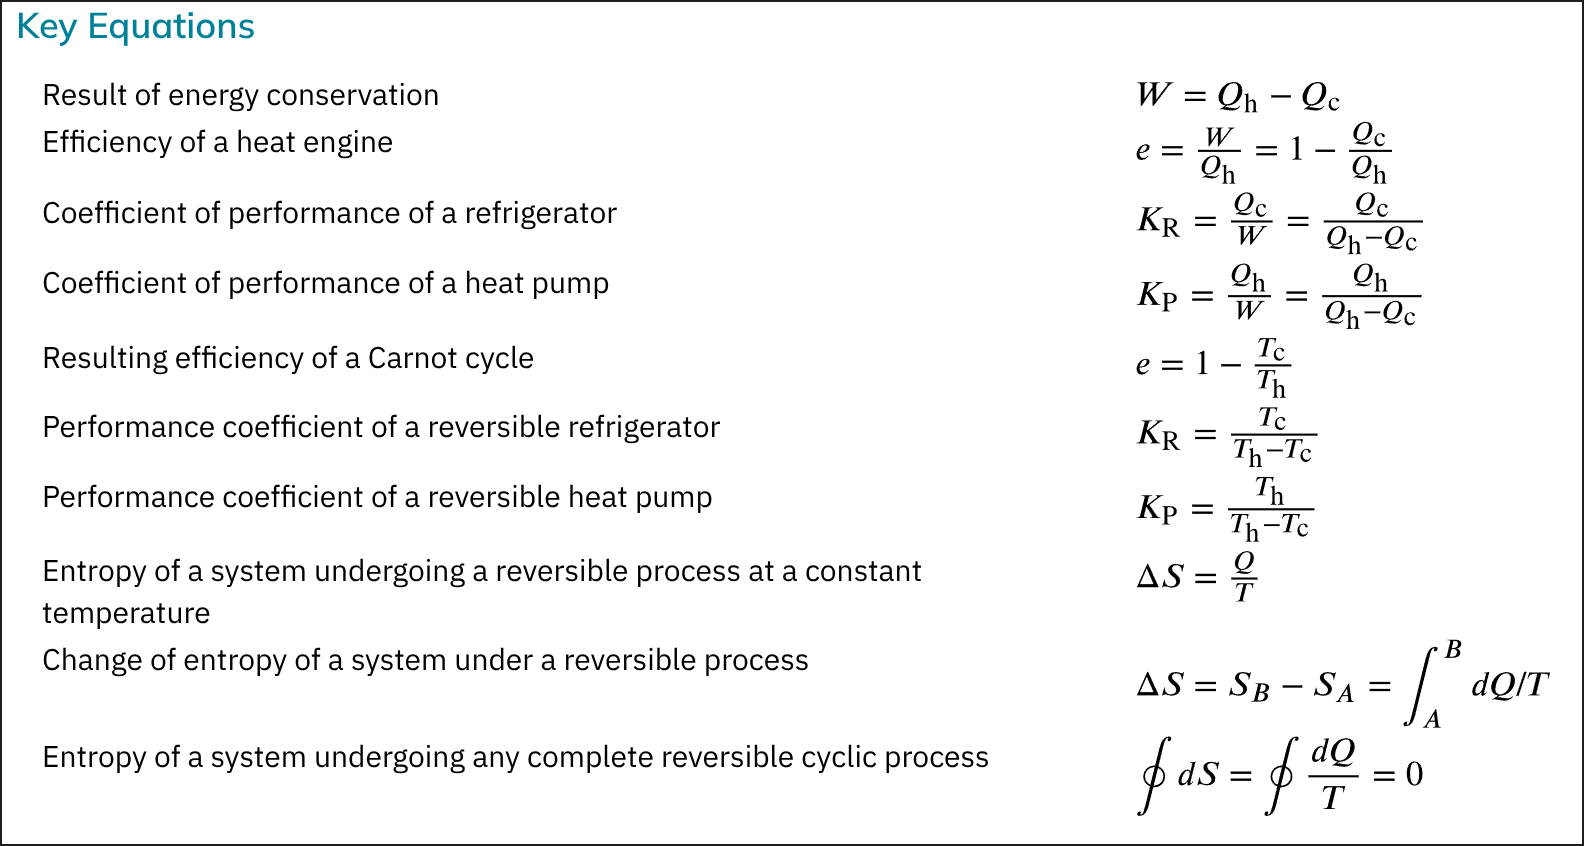
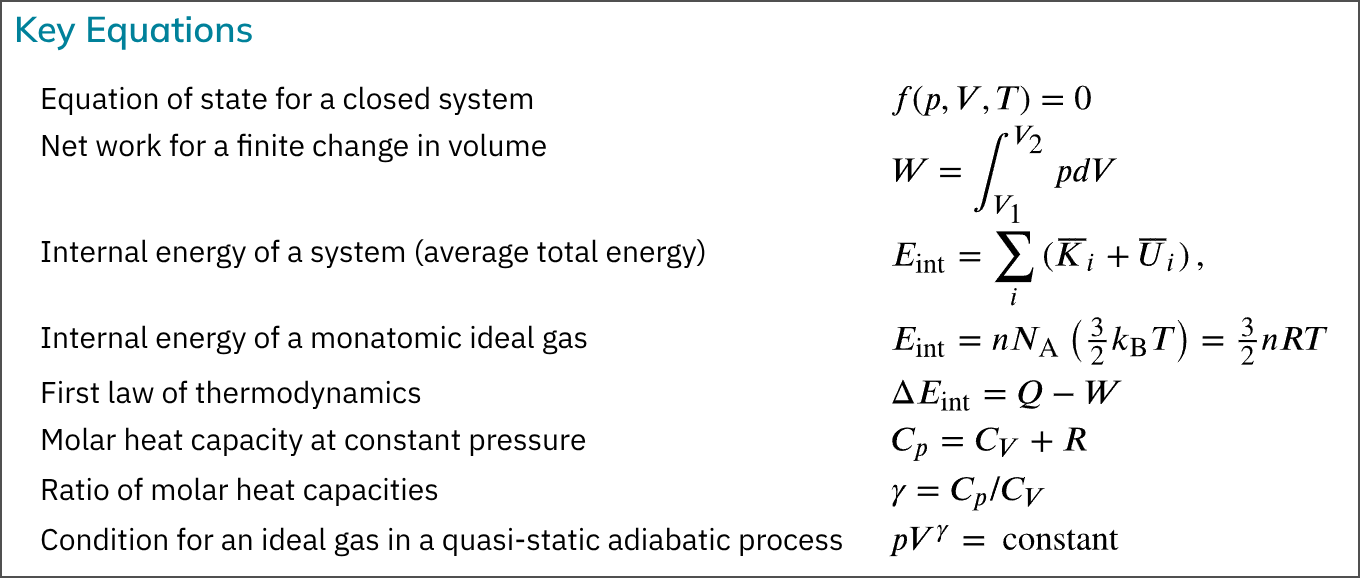

# Problem 19
A mole of ideal monatomic gas at 0 $\degree C$ and 1.00
atm is warmed up to expand isobarically to triple
its volume. How much heat is transferred during
the process?


we use the formula:
$$
pV = nRT
$$

In [56]:
T = Q_(0, "degC").to("K")
P = Q_(1, "atm")
mole = Q_(1, "mol")
R = Q_(8.314, "J/(mol*K)")

# We calculate the initial volume using the ideal gas law
# pV = nRT  => V = nRT/p
V1 = (mole * R * T) / P

# The reaction is isobaric, so P2 = P1, we know that the volume triples, so V2 = 3*V1
V2 = 3 * V1

# We can now calculate the work that is the area under the curve
W = P * (V2 - V1)
W = W.to("J")
print(f"The work done by the gas is {W:.2f}")

# Now we can use the work to find how much heat is transferred to the gas
# We can use the first law of thermodynamics, which states that the change in internal energy
# of a system is equal to the heat added to the system minus the work done by the system
# ΔU = Q - W
# Rearranging gives us Q = ΔU + W
# For an ideal gas, the change in internal energy is given by ΔU = n * Cv * ΔT
# For a monatomic ideal gas, Cv = (3/2) * R
Cv = (3 / 2) * R

# We need to find the change in temperature, we can use the ideal gas law to find T2
# We know that (p1 * v1 / t1) = (p2 * v2 / t2), so t2 = (p2 * v2 * t1) / (p1 * v1)
T2 = (P * V2 * T) / (P * V1)
T2 = T2.to("K")

delta_T = T2 - T
print(f"The change in temperature is {delta_T:.2f}")
delta_U = mole * Cv * delta_T
print(f"The change in internal energy is {delta_U:.2f}")
Q = delta_U + W
Q = Q.to("J")
print(f"The heat transferred to the gas is {Q:.2f}")

The work done by the gas is 4541.94 joule
The change in temperature is 546.30 kelvin
The change in internal energy is 6812.91 joule
The heat transferred to the gas is 11354.85 joule


# Problem 22
An engine is found to have an efficiency of 0.40.
If it does 200 J of work per cycle, what are the
corresponding quantities of heat absorbed and
discharged?


we use the formulas:
$$
e = 1 - \frac{Q_c}{Q_h} = \frac{W}{Q_h}
$$


In [57]:
efficiency = 0.4
W_pr_cycle = Q_(200, "J")

# We can rearrange the formula to get
Q_h = W_pr_cycle / efficiency
Q_h = Q_h.to("J")
print(f"The heat that must be supplied to the engine is {Q_h:.2f}")

# We can now calculate Q_c
Q_c = (efficiency - 1) * Q_h
Q_c = Q_c.to("J")
print(f"The heat that must be expelled to the cold reservoir is {abs(Q_c):.2f}") 

The heat that must be supplied to the engine is 500.00 joule
The heat that must be expelled to the cold reservoir is 300.00 joule


# Problem 23
In performing 100.0 J of work, an engine
discharges 50.0 J of heat. What is the efficiency
of the engine?

we use the formulas:
$$
e = 1 - \frac{Q_c}{Q_h} = \frac{W}{Q_h}
$$

In [58]:
W = Q_(100, "J")
Q_c = Q_(50, "J")


eq1 = Eq(1 - symbols('Q_c') / symbols('Q_h'), symbols('W') / symbols('Q_h'))
solve(eq1, symbols('Q_h'))

[Q_c + W]

In [59]:
Q_h = Q_c + W
e = W / Q_h
print(f"The efficiency of the engine is {e:.3f}")

The efficiency of the engine is 0.667 dimensionless


# Problem 30
During one cycle, a refrigerator removes 500 J
from a cold reservoir and discharges 800 J to its
hot reservoir. 

(a) What is its coefficient of
performance? 

(b) How much work per cycle
does it require to operate?

We use the formula:
$$
K_R = \frac{Q_c}{W} = \frac{Q_c}{Q_h - Q_c}
$$

In [60]:
Q_c = Q_(800, "J")
Q_h = Q_(500, "J")

K_R = abs(Q_c / (Q_h - Q_c))
print(f"The coefficient of performance of the refrigerator is {K_R:.2f}")

W = Q_c / K_R
print(f"The work required to run the refrigerator is {W:.2f}")


The coefficient of performance of the refrigerator is 2.67 dimensionless
The work required to run the refrigerator is 300.00 joule


# Problem 44
In an isothermal reversible expansion at 27 $\degree C$,
an ideal gas does 20 J of work. What is the
entropy change of the gas?

We have the formula:
$$
\Delta S = \frac{Q}{T}
$$
and
$$
\Delta S = S_B - S_A = \int_A^B d Q/T
$$


In [61]:
T = Q_(27, "degC").to("K")
W = Q_(20, "J")

# in an isothermal process, so Q = W

Delta_S = W / T
print(f"The change in entropy is {Delta_S:.3f}")

The change in entropy is 0.067 joule / kelvin


# Problem 45
An ideal gas at 300 K is compressed
isothermally to one-fifth its original volume.
Determine the entropy change per mole of the gas.

we use the formula:
$$
\Delta S = nRln(\frac{V_1}{V_2})
$$

In [62]:
T = Q_(300, "K")
compression_ratio = 1/5 # V1/V2
mole = Q_(1, "mol")
R = Q_(8.314, "J/(mol*K)")

Delta_s = mole * R * np.log(compression_ratio)
print(f"The change in entropy is {Delta_s:.3f}")

The change in entropy is -13.381 joule / kelvin


# Problem 47
A metal rod is used to conduct heat between
two reservoirs at temperatures $T_h$ and $T_c$
respectively. When an amount of heat
Q flows
through the rod from the hot to the cold
reservoir, what is the net entropy change of the
rod, the hot reservoir, the cold reservoir, and the
universe?

We know the change of entropy is 0, so
$$
\Delta S = 0 
$$
The change in entropy for a hot reservoir
$$
\Delta S = - \frac{Q}{T_h}
$$
Change in entropy for cold reservoir
$$
\Delta S = \frac{Q}{T_c}
$$
Change in entropy of the Universe 
$$
\Delta S = - \frac{Q}{T_h} + \frac{Q}{T_c} = Q(- \frac{1}{T_h} + \frac{1}{T_c}) 
$$

# Problem 57
Two hundred grams of water at 0 $\degree C$ is brought
into contact with a heat reservoir at 80 $\degree C$. 

After
thermal equilibrium is reached, what is the
temperature of the water? 

Of the reservoir? 

How
much heat has been transferred in the process?
What is the entropy change of the water? 

Of the
reservoir? 

What is the entropy change of the
universe?

In [74]:
m = Q_(200, "g")
T = Q_(0, "degC").to("K")
T_heat_reservoir = Q_(80, "degC").to("K")

print(f"By definition, the temperature of the reservoir does not change. Its temperature remains {T_heat_reservoir:.2f}") 
print(f"The water at equilibrium will be at {T_heat_reservoir:.2f}")

c_water = Q_(4.18, "J/(g*degC)")
Q = m * c_water * (T_heat_reservoir - T)
Q = Q.to("J")
print(f"The heat transferred to the water is {Q:.1e}")

Delta_S_water = m * c_water * np.log(T_heat_reservoir / T)
print(f"The change in entropy of the water is {Delta_S_water:.3f}")

Delta_S_reservoir = -Q / T_heat_reservoir
print(f"The change in entropy of the reservoir is {Delta_S_reservoir:.3f}")

Delta_S_total = Delta_S_water + Delta_S_reservoir
print(f"The total change in entropy is {Delta_S_total:.3f}")


By definition, the temperature of the reservoir does not change. Its temperature remains 353.15 kelvin
The water at equilibrium will be at 353.15 kelvin
The heat transferred to the water is 6.7e+04 joule
The change in entropy of the water is 214.745 joule / delta_degree_Celsius
The change in entropy of the reservoir is -189.381 joule / kelvin
The total change in entropy is 25.364 joule / kelvin


# Problem 61
The Carnot cycle is represented by the
temperature-entropy diagram shown below. 

(a)
How much heat is absorbed per cycle at the
high-temperature reservoir? 

(b) How much heat
is exhausted per cycle at the low-temperature
reservoir? 

(c) How much work is done per cycle
by the engine? 

(d) What is the efficiency of the
engine?

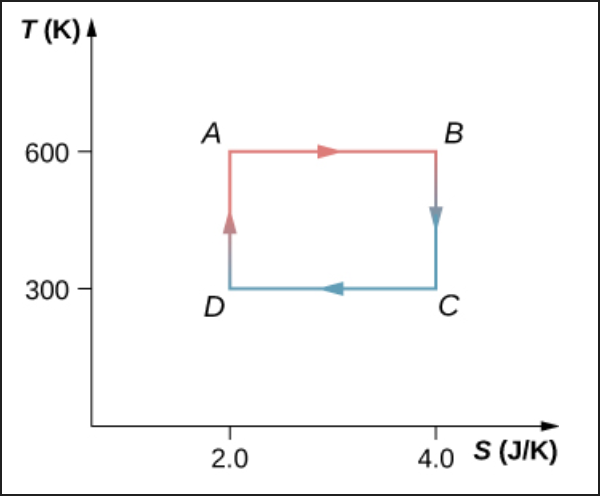

In [82]:
Q_h = Q_(600, "K") * (Q_(4, "J/K") - Q_(2, "J/K"))
Q_c = Q_(300, "K") * (Q_(2, "J/K") - Q_(4, "J/K"))
Q_c = abs(Q_c) # Abs because Q_c is negative as heat is expelled
W = Q_h - Q_c
e = W / Q_h
print(f"The heat absorbed by the engine is {Q_h:.2f}")
print(f"The heat expelled by the engine is {Q_c:.2f}")
print(f"The work done by the engine is {W:.2f}")
print(f"The efficiency of the engine is {e:.3f}")


The heat absorbed by the engine is 1200.00 joule
The heat expelled by the engine is 600.00 joule
The work done by the engine is 600.00 joule
The efficiency of the engine is 0.500 dimensionless
